In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sbn


In [2]:
colnames = ['id','diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean',
           'concave_points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se',
           'compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',
           'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']


In [3]:
cancer_data = pd.read_csv("data.csv",names = colnames, header = None)
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Since ID cannot be used for classification we can drop the column
cancer_data.drop('id',axis=1,inplace=True)


In [5]:
len(cancer_data)

569

In [6]:
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({'M':1,'B':0})
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#Check for any null values in the dataset
cancer_data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave_points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave_points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave_points_worst       False
symmetry_worst             False
fractal_di

In [8]:
cancer_data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


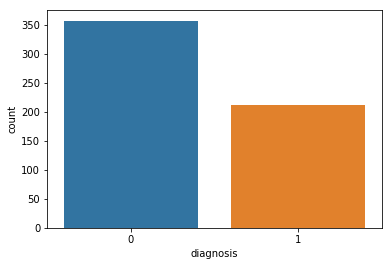

In [9]:
#We can count how many people have malignant and benign tumors . 
#Now lets also split the data into our features and labels, then map our labels to integers.
sbn.countplot(x = 'diagnosis', data = cancer_data)


In [10]:
cancer_data.columns

Index([u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave_points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave_points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave_points_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object')

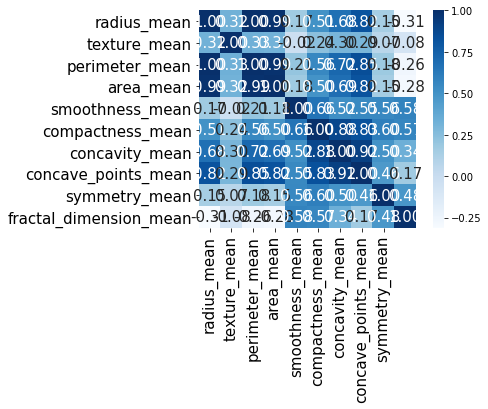

In [11]:
#From the feature names, we cann notice that there are three main categories 'value means', 'standard deviation' and 'worst'.
#Let us explore the correlation between sets of features
x = cancer_data.iloc[:, 1:]
features_mean = x.columns[:10]
features_se = x.columns[10:20]
features_worst = x.columns[20:]
corr = x[features_mean].corr()
g = sbn.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'Blues' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (20,20)

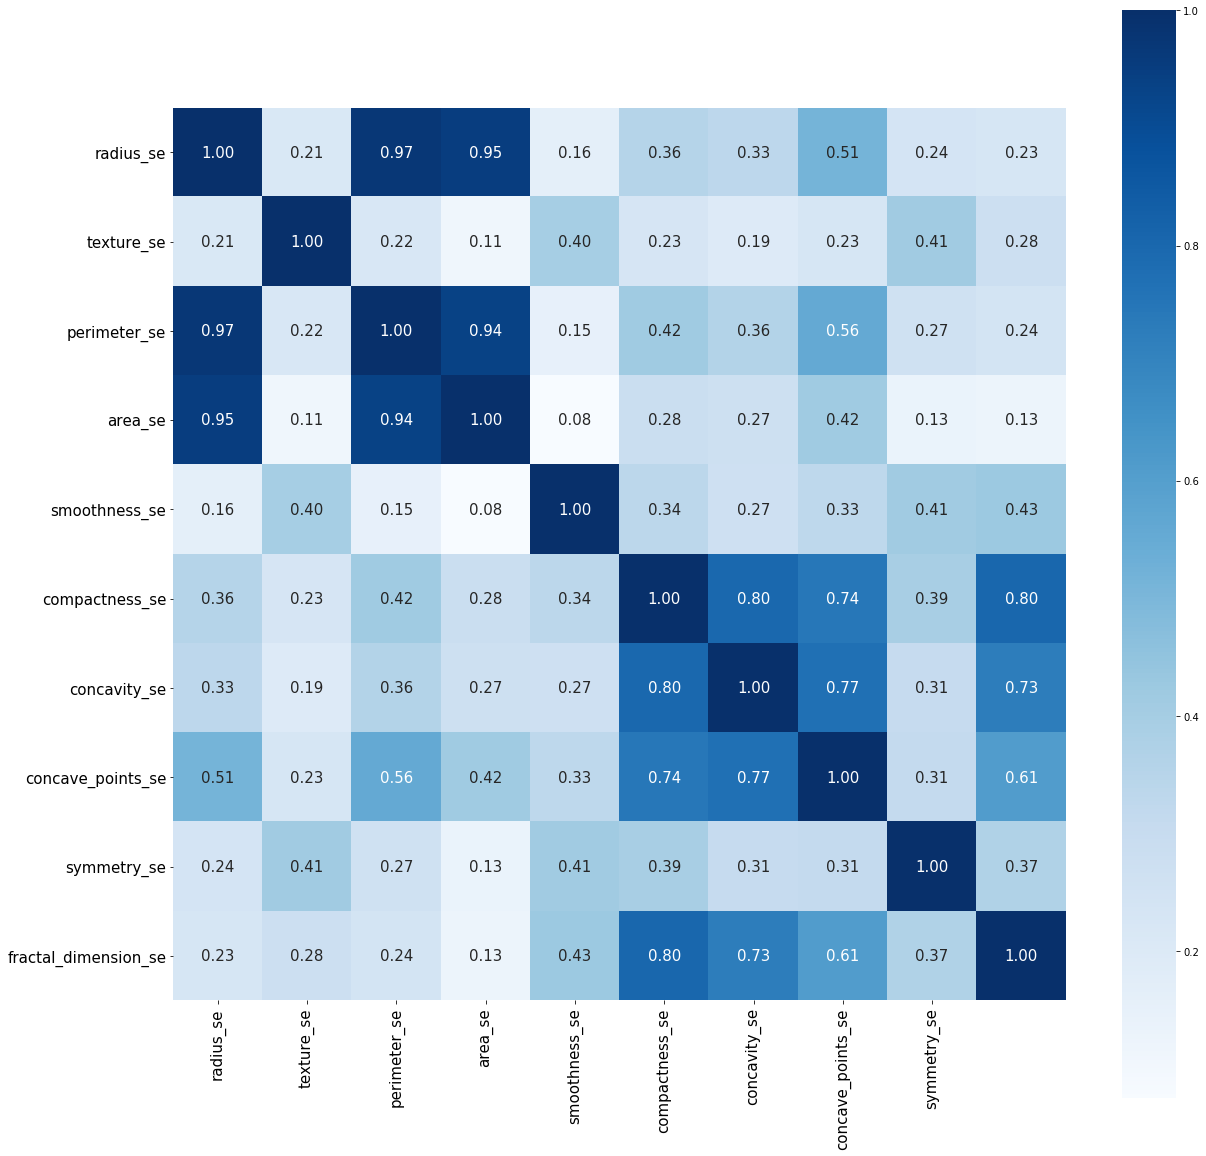

In [12]:
corr = x[features_se].corr()
g = sbn.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'Blues' )
g.set_xticklabels(rotation=90, labels = features_se, size = 15)
g.set_yticklabels(rotation=0, labels = features_se, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (20,20)

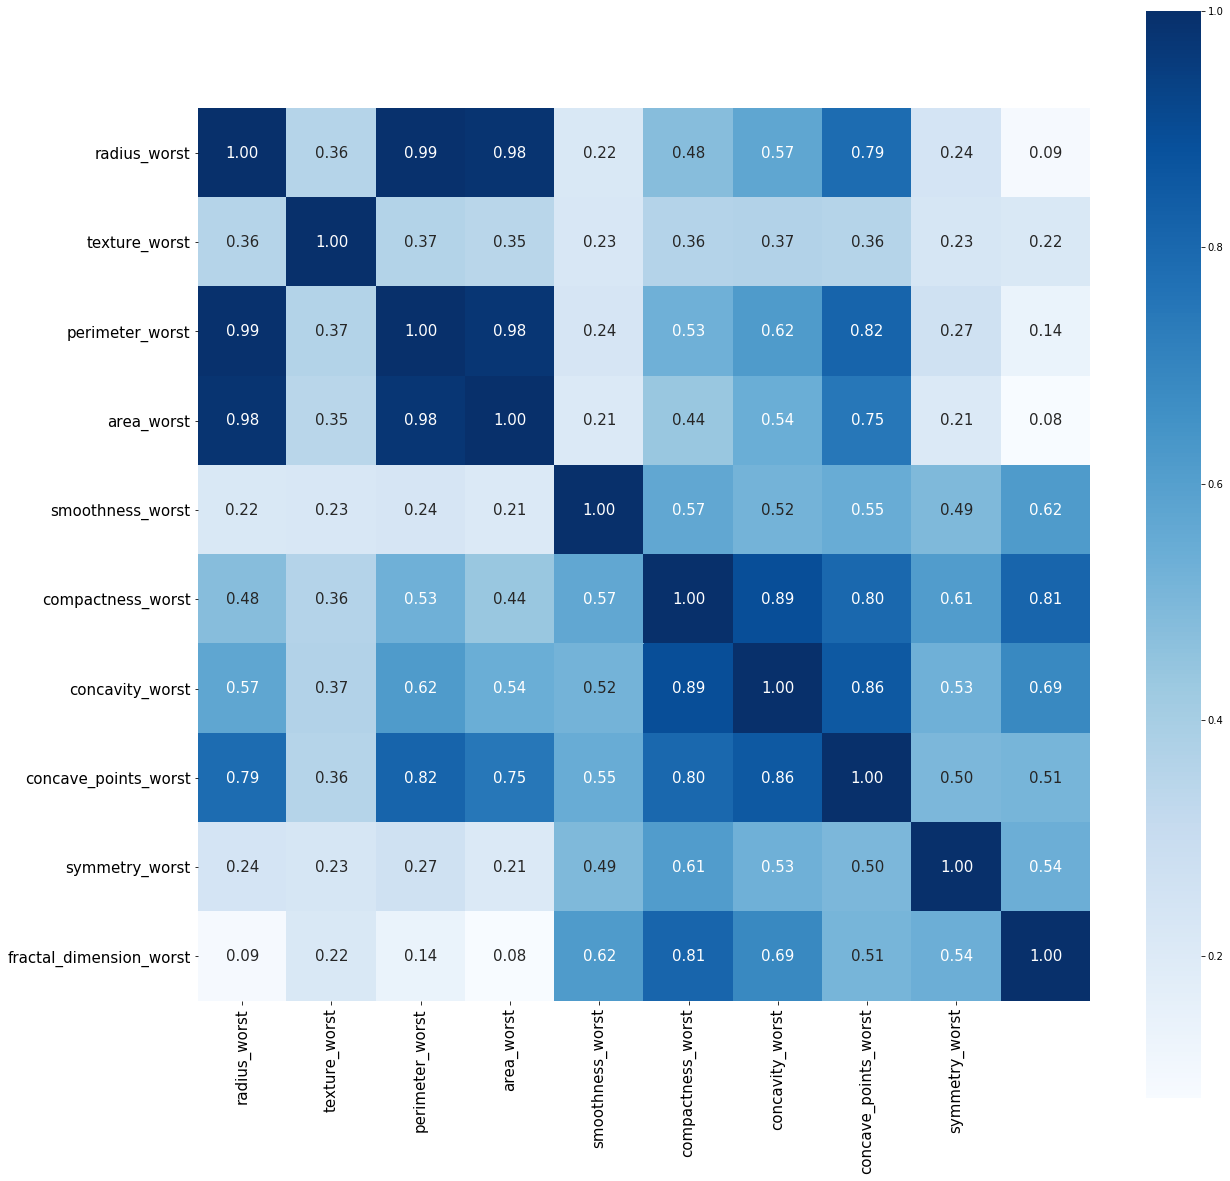

In [13]:
corr = x[features_worst].corr()
g = sbn.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'Blues' )
g.set_xticklabels(      rotation=90, labels = features_worst, size = 15)
g.set_yticklabels(rotation=0, labels = features_worst, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (20,20)

In [14]:
dfM=cancer_data[cancer_data['diagnosis'] ==1]
dfB=cancer_data[cancer_data['diagnosis'] ==0]

C:\Users\clari\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


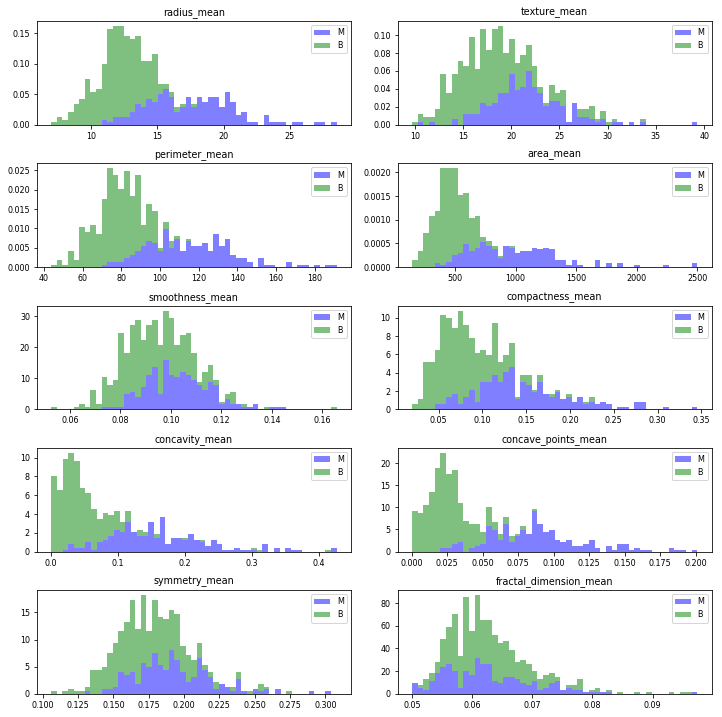

In [15]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_data[features_mean[i]]) - min(cancer_data[features_mean[i]]))/50
    ax.hist([dfM[features_mean[i]],dfB[features_mean[i]]], bins=np.arange(min(cancer_data[features_mean[i]]), max(cancer_data[features_mean[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[i])
plt.tight_layout()
plt.show()

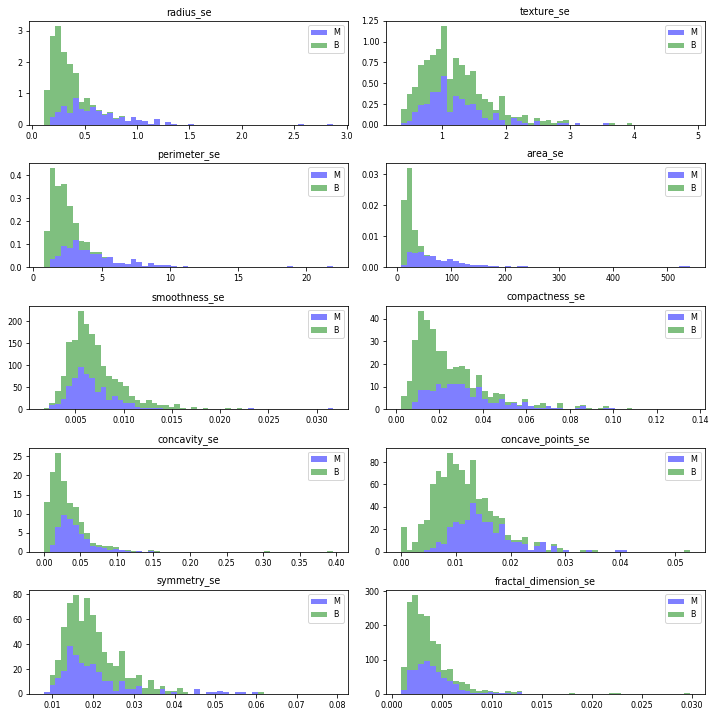

In [16]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_data[features_se[i]]) - min(cancer_data[features_se[i]]))/50
    ax.hist([dfM[features_se[i]],dfB[features_se[i]]], bins=np.arange(min(cancer_data[features_se[i]]), max(cancer_data[features_se[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_se[i])
plt.tight_layout()
plt.show()

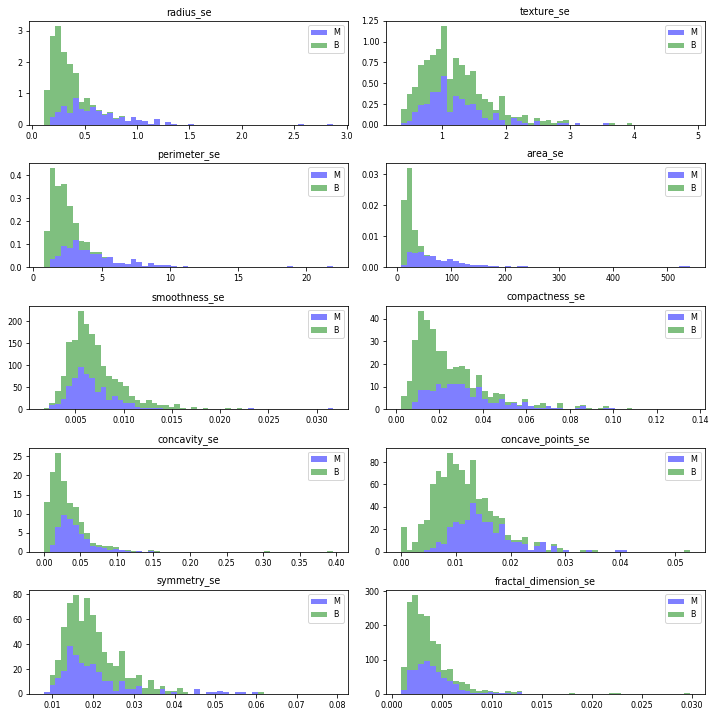

In [17]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_data[features_se[i]]) - min(cancer_data[features_se[i]]))/50
    ax.hist([dfM[features_se[i]],dfB[features_se[i]]], bins=np.arange(min(cancer_data[features_se[i]]), max(cancer_data[features_se[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_se[i])
plt.tight_layout()
plt.show()

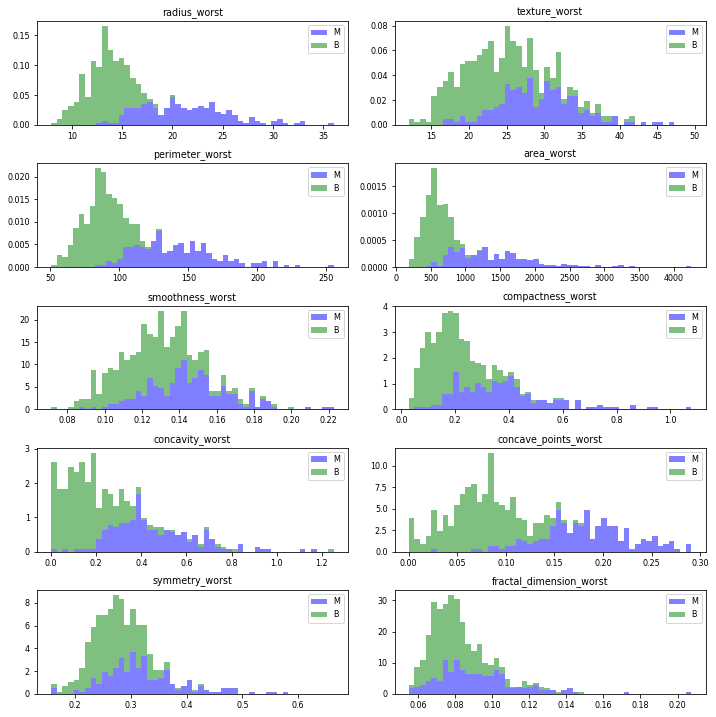

In [18]:
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,10))
axes = axes.ravel()
for i,ax in enumerate(axes):
    ax.figure
    binwidth= (max(cancer_data[features_worst[i]]) - min(cancer_data[features_worst[i]]))/50
    ax.hist([dfM[features_worst[i]],dfB[features_worst[i]]], bins=np.arange(min(cancer_data[features_worst[i]]), max(cancer_data[features_worst[i]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['b','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_worst[i])
plt.tight_layout()
plt.show()

In [19]:
#Observations
#1.None of the histograms show any noticeable large outliers so there is no need for further cleaning of data
#2.Values of radius, perimeter, area, compactness, concavity and concave points can be potentially used for classification as the
#  larger values of these parameters shows a high correlation with malignant tumors.
#3.No noticeable trends can be observed from texture, smoothness, symmetry or fractual dimension
#4.We can use mean values for our classification

In [20]:
#Model building
#In this step we will divide the data into test and train data to create the data model.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
f_data = cancer_data.iloc[:,1:11]
t_data = cancer_data.iloc[:,0:1]
X_train, X_test, y_train, y_test = train_test_split(f_data, t_data, test_size=0.4, random_state=0)

In [23]:
X_train.shape

(341, 10)

In [24]:
y_train.shape

(341, 1)

In [25]:
X_test.shape

(228, 10)

In [26]:
y_test.shape

(228, 1)

In [27]:
#Classification
#First we will use the decision tress classifier

In [28]:
#from sklearn import tree
#clf = tree.DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier  
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.89


In [29]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
y_pre = fit.predict(X_test) 
y_pre

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
y_pre.shape

(228L,)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

[[137   8]
 [ 17  66]]


In [33]:
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

             precision    recall  f1-score   support

          0       0.89      0.94      0.92       145
          1       0.89      0.80      0.84        83

avg / total       0.89      0.89      0.89       228



In [34]:
cancer_feature_names = list(f_data.columns)
cancer_feature_names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [35]:
cancer_target_names_object = cancer_data['diagnosis'].apply(lambda x: "M" if x == 1 else "B").unique()
cancer_target_names = list(cancer_target_names_object)

In [36]:
from sklearn import tree
with open('c_data.dot', 'w') as f:
    f = tree.export_graphviz(fit, out_file=f, feature_names=cancer_feature_names, class_names=cancer_target_names, filled=True, rounded=True, special_characters=True)

In [37]:
#Need to show the decision tree
#dot c_data.dot -Tpng -o c_data.png

In [38]:
clf_1 = DecisionTreeClassifier(criterion='entropy')

In [39]:
clf_1

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
fit_1 = clf_1.fit(X_train, y_train)

In [41]:
y_pre_1 = fit_1.predict(X_test)   
y_pre_1

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [42]:
cm_1 = confusion_matrix(y_test, y_pre_1)
print cm

[[137   8]
 [ 17  66]]


In [43]:
print classification_report(y_test,y_pre_1)

             precision    recall  f1-score   support

          0       0.94      0.95      0.95       145
          1       0.91      0.89      0.90        83

avg / total       0.93      0.93      0.93       228



In [44]:
#AUC is a good way for evaluation for this type of problems.

In [45]:
from sklearn.metrics import roc_curve, auc

In [46]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pre_1)

In [47]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9216452014956378

In [48]:
# From above setting criterion = "entropy' improved performance, recall improved from 0.83 to 0.90

In [49]:
#k nearest neighbours algorithm

In [50]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(f_data, t_data, test_size=0.4, random_state=0)

C:\Users\clari\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
X_train.shape

(341, 10)

In [52]:
y_train.shape

(341, 1)

In [53]:
X_test.shape

(228, 10)

In [54]:
y_test.shape

(228, 1)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(5)
clf.fit(X_train, y_train)

C:\Users\clari\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
predicted = clf.predict(X_test)
predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [57]:
predicted.shape

(228L,)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print cm

[[138   7]
 [ 16  67]]


In [59]:
from sklearn.metrics import classification_report
print classification_report(y_test, predicted)

             precision    recall  f1-score   support

          0       0.90      0.95      0.92       145
          1       0.91      0.81      0.85        83

avg / total       0.90      0.90      0.90       228



In [60]:
print "[Train/test split] score: {:.5f}".format(clf.score(X_test, y_test))

[Train/test split] score: 0.89912


In [61]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=4)

In [62]:
for train_index, test_index in kf.split(f_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = f_data.iloc[train_index], f_data.iloc[test_index]
    y_train, y_test = t_data.iloc[train_index], t_data.iloc[test_index]


('TRAIN:', array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 2

In [63]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train, X_test = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train, y_test = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf.fit(X_train, y_train) 
    print "[fold {0}] score: {1:.5f}".format(k, clf.score(X_test, y_test))

[fold 0] score: 0.76316
[fold 1] score: 0.85088
[fold 2] score: 0.94737
[fold 3] score: 0.90351
[fold 4] score: 0.89381


C:\Users\clari\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [64]:
#Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(f_data, t_data, test_size=0.4, random_state=0)
clf = GaussianNB()
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

C:\Users\clari\Anaconda2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
prediction.shape

(228L,)

In [67]:
cm = confusion_matrix(y_test,prediction)
print cm

[[136   9]
 [ 13  70]]


In [68]:
print classification_report(y_test, prediction)

             precision    recall  f1-score   support

          0       0.91      0.94      0.93       145
          1       0.89      0.84      0.86        83

avg / total       0.90      0.90      0.90       228



In [69]:
from sklearn import metrics
accuracy = metrics.accuracy_score(prediction,y_test)
print("Accuracy for Naive Bayes : %s" % "{0:.3%}".format(accuracy))

Accuracy for Naive Bayes : 90.351%


In [ ]:
#Accuracy of KNN

In [70]:
accuracy = metrics.accuracy_score(predicted,y_test)
print("Accuracy for kNN : %s" % "{0:.3%}".format(accuracy))

Accuracy for kNN : 89.912%


In [ ]:
#Accuracy of Decission Trees- Gini & Entropy

In [71]:
accuracy = metrics.accuracy_score(y_pre,y_test)
print("Accuracy for Decision Tree : %s" % "{0:.3%}".format(accuracy))

Accuracy for Decision Tree : 89.035%


In [73]:
accuracy = metrics.accuracy_score(y_pre_1,y_test)
print("Accuracy for Decision Tree : %s" % "{0:.3%}".format(accuracy))

Accuracy for Decision Tree : 92.982%
